In [1]:
import os
os.getcwd()


'C:\\Users\\Vrattika'

In [2]:
os.chdir('F:\\DataScience')

In [3]:
os.getcwd()

'F:\\DataScience'

vaccinedata = pd.read_e

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    •	location: name of the country (or region within a country).

    •	iso_code: ISO 3166-1 alpha-3 – three-letter country codes.

    •	date: date of the observation.
    
    •	total_vaccinations: total number of doses administered. For vaccines that require multiple doses, each individual dose is counted. If a person receives one dose of the vaccine, this metric goes up by 1. If they receive a second dose, it goes up by 1 again. If they receive a third/booster dose, it goes up by 1 again.
    
    •	total_vaccinations_per_hundred: total_vaccinations per 100 people in the total population of the country.
    
    •	daily_vaccinations_raw: daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead.
    
    •	daily_vaccinations: new doses administered per day (7-day smoothed). For countries that don't report data on a daily basis, we assume that doses changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window. An example of how we perform this calculation can be found here.
    
    •	daily_vaccinations_per_million: daily_vaccinations per 1,000,000 people in the total population of the country.
    
    •	people_vaccinated: total number of people who received at least one vaccine dose. If a person receives the first dose of a 2-dose vaccine, this metric goes up by 1. If they receive the second dose, the metric stays the same.
    
    •	people_vaccinated_per_hundred: people_vaccinated per 100 people in the total population of the country.
    
    •	people_fully_vaccinated: total number of people who received all doses prescribed by the vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1.
    
    •	people_fully_vaccinated_per_hundred: people_fully_vaccinated per 100 people in the total population of the country.
    
    Note: for people_vaccinated and people_fully_vaccinated we are dependent on the necessary data being made available, so we may not be able to make these metrics available for some countries.



In [5]:
vaccinedata = pd.read_csv('DATASETS/india_vaccination.csv')

In [6]:
vaccinedata.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,India,IND,1/15/2021,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN
1,India,IND,1/16/2021,191181.0,191181.0,NaN,NaN,191181.0,191181.0,0.01,0.01,NaN,NaN,137.0
2,India,IND,1/17/2021,224301.0,224301.0,NaN,NaN,33120.0,112150.0,0.02,0.02,NaN,NaN,80.0
3,India,IND,1/18/2021,454049.0,454049.0,NaN,NaN,229748.0,151350.0,0.03,0.03,NaN,NaN,109.0
4,India,IND,1/19/2021,674835.0,674835.0,NaN,NaN,220786.0,168709.0,0.05,0.05,NaN,NaN,121.0


##### In the above code you can see that vaccination started in india on 16th Jan 2021 so 15th Jan is NaN

In [7]:
vaccinedata.tail()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
227,India,IND,8/30/2021,639305611.0,493077195.0,146228416.0,NaN,6717760.0,8152340.0,45.88,35.39,10.49,NaN,5851.0
228,India,IND,8/31/2021,644799225.0,497002083.0,147797142.0,NaN,5493614.0,8009674.0,46.27,35.67,10.61,NaN,5748.0
229,India,IND,9/1/2021,661576916.0,509668131.0,151908785.0,NaN,16777691.0,9093383.0,47.48,36.58,10.90,NaN,6526.0
230,India,IND,9/2/2021,669775627.0,515627968.0,154147659.0,NaN,8198711.0,9340631.0,48.07,37.00,11.06,NaN,6703.0
231,India,IND,9/3/2021,675654935.0,519667854.0,155987081.0,NaN,5879308.0,8587773.0,48.49,37.29,11.19,NaN,6163.0


In [8]:
vaccinedata = vaccinedata.drop(['location', 'iso_code', 'total_boosters', 'total_boosters_per_hundred'], axis=1) 

In [9]:
vaccinedata.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,1/15/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,1/16/2021,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,137.0
2,1/17/2021,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,80.0
3,1/18/2021,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,109.0
4,1/19/2021,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,121.0


In [10]:
vaccinedata = vaccinedata.iloc[1: , :]

In [11]:
vaccinedata.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1,1/16/2021,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,137.0
2,1/17/2021,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,80.0
3,1/18/2021,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,109.0
4,1/19/2021,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,121.0
5,1/20/2021,806484.0,806484.0,NaN,131649.0,161297.0,0.06,0.06,NaN,116.0


In [12]:
vaccinedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 1 to 231
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 231 non-null    object 
 1   total_vaccinations                   220 non-null    float64
 2   people_vaccinated                    220 non-null    float64
 3   people_fully_vaccinated              192 non-null    float64
 4   daily_vaccinations_raw               210 non-null    float64
 5   daily_vaccinations                   231 non-null    float64
 6   total_vaccinations_per_hundred       220 non-null    float64
 7   people_vaccinated_per_hundred        220 non-null    float64
 8   people_fully_vaccinated_per_hundred  192 non-null    float64
 9   daily_vaccinations_per_million       231 non-null    float64
dtypes: float64(9), object(1)
memory usage: 18.2+ KB


In [13]:
vaccinedata['date'] = pd.to_datetime(vaccinedata['date'])
vaccinedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 1 to 231
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 231 non-null    datetime64[ns]
 1   total_vaccinations                   220 non-null    float64       
 2   people_vaccinated                    220 non-null    float64       
 3   people_fully_vaccinated              192 non-null    float64       
 4   daily_vaccinations_raw               210 non-null    float64       
 5   daily_vaccinations                   231 non-null    float64       
 6   total_vaccinations_per_hundred       220 non-null    float64       
 7   people_vaccinated_per_hundred        220 non-null    float64       
 8   people_fully_vaccinated_per_hundred  192 non-null    float64       
 9   daily_vaccinations_per_million       231 non-null    float64       
dtypes: datetime64[

In [14]:
vaccinedata.set_index('date', inplace=True)
vaccinedata.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,
2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,137.0
2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,80.0
2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,109.0
2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,121.0
2021-01-20,806484.0,806484.0,NaN,131649.0,161297.0,0.06,0.06,NaN,116.0


In [15]:
vaccinedata.tail()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,
2021-08-30,639305611.0,493077195.0,146228416.0,6717760.0,8152340.0,45.88,35.39,10.49,5851.0
2021-08-31,644799225.0,497002083.0,147797142.0,5493614.0,8009674.0,46.27,35.67,10.61,5748.0
2021-09-01,661576916.0,509668131.0,151908785.0,16777691.0,9093383.0,47.48,36.58,10.90,6526.0
2021-09-02,669775627.0,515627968.0,154147659.0,8198711.0,9340631.0,48.07,37.00,11.06,6703.0
2021-09-03,675654935.0,519667854.0,155987081.0,5879308.0,8587773.0,48.49,37.29,11.19,6163.0


In [16]:
# vaccinedata = vaccinedata.astype({'total_vaccinations':'int', 'people_vaccinated':'int', 'people_fully_vaccinated':'int', 'daily_vaccinations_raw':'int', 'daily_vaccinations':'int', 'daily_vaccinations_per_million':'int'}) 

In [17]:
vaccinedata.shape

(231, 9)

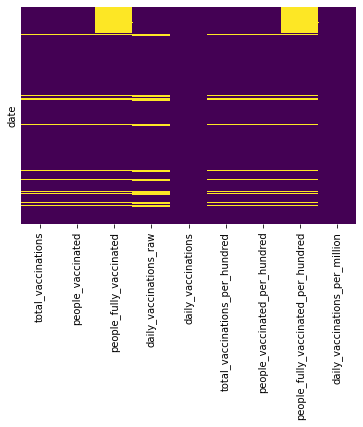

In [18]:
sns.heatmap(vaccinedata.isnull(), yticklabels = False, cbar = False, cmap="viridis");

In [19]:
##Missing values
vaccinedata.isna().sum()

total_vaccinations                     11
people_vaccinated                      11
people_fully_vaccinated                39
daily_vaccinations_raw                 21
daily_vaccinations                      0
total_vaccinations_per_hundred         11
people_vaccinated_per_hundred          11
people_fully_vaccinated_per_hundred    39
daily_vaccinations_per_million          0
dtype: int64

In [20]:
vaccinedata.people_fully_vaccinated

date
2021-01-16            NaN
2021-01-17            NaN
2021-01-18            NaN
2021-01-19            NaN
2021-01-20            NaN
                 ...     
2021-08-30    146228416.0
2021-08-31    147797142.0
2021-09-01    151908785.0
2021-09-02    154147659.0
2021-09-03    155987081.0
Name: people_fully_vaccinated, Length: 231, dtype: float64

In [21]:
fully_vaccinated = vaccinedata[['people_fully_vaccinated','people_fully_vaccinated_per_hundred' ]] 
fully_vaccinated

,people_fully_vaccinated,people_fully_vaccinated_per_hundred
date,,
2021-01-16,NaN,NaN
2021-01-17,NaN,NaN
2021-01-18,NaN,NaN
2021-01-19,NaN,NaN
2021-01-20,NaN,NaN
...,...,...
2021-08-30,146228416.0,10.49
2021-08-31,147797142.0,10.61
2021-09-01,151908785.0,10.90


In [22]:
vaccinedata = vaccinedata.drop(['people_fully_vaccinated','people_fully_vaccinated_per_hundred'], axis=1) 

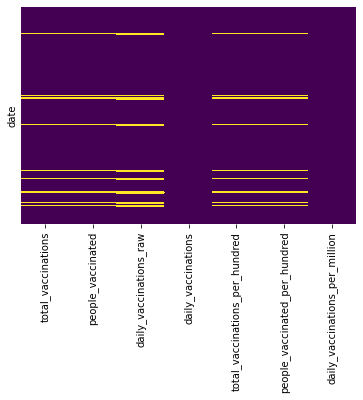

In [23]:
sns.heatmap(vaccinedata.isnull(), yticklabels = False, cbar = False, cmap="viridis");

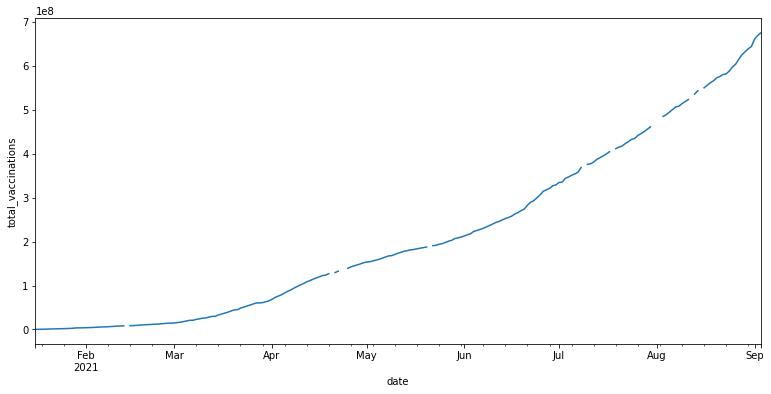

In [24]:
vaccinedata['total_vaccinations'].plot(kind = 'line',figsize=(13,6))

plt.ylabel('total_vaccinations')
plt.xlabel('date')

plt.show()        

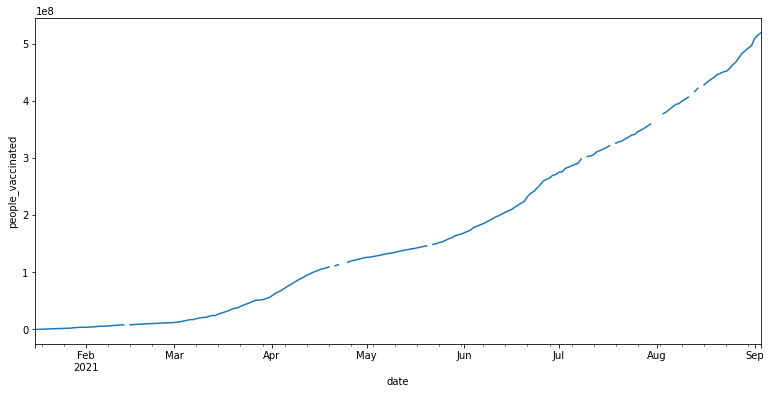

In [25]:
vaccinedata['people_vaccinated'].plot(kind = 'line',figsize=(13,6))

plt.ylabel('people_vaccinated')
plt.xlabel('date')

plt.show()

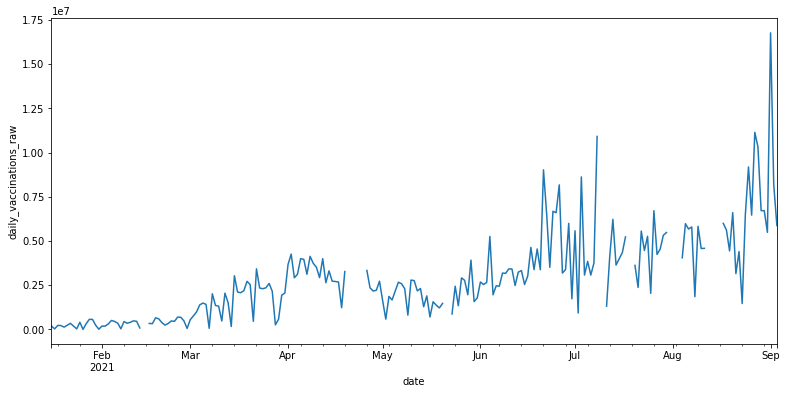

In [26]:
vaccinedata['daily_vaccinations_raw'].plot(kind = 'line',figsize=(13,6))

plt.ylabel('daily_vaccinations_raw')
plt.xlabel('date')

plt.show()

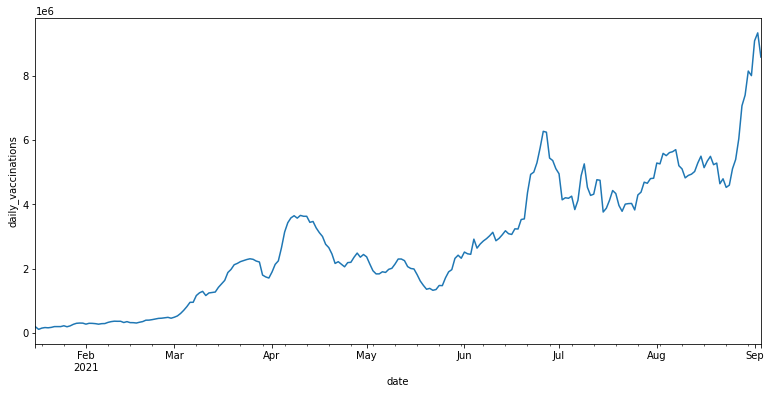

In [27]:
vaccinedata['daily_vaccinations'].plot(kind = 'line',figsize=(13,6))

plt.ylabel('daily_vaccinations')
plt.xlabel('date')

plt.show()

In [28]:
daily_vacc = vaccinedata['daily_vaccinations'].pct_change()
daily_vacc

date
2021-01-16         NaN
2021-01-17   -0.413383
2021-01-18    0.349532
2021-01-19    0.114694
2021-01-20   -0.043934
                ...   
2021-08-30    0.101327
2021-08-31   -0.017500
2021-09-01    0.135300
2021-09-02    0.027190
2021-09-03   -0.080600
Name: daily_vaccinations, Length: 231, dtype: float64

In [29]:
daily_vacca_rolling_mean = daily_vacc.rolling(window = 5).mean() 

daily_vacca_rolling_mean.head(10)

date
2021-01-16         NaN
2021-01-17         NaN
2021-01-18         NaN
2021-01-19         NaN
2021-01-20         NaN
2021-01-21    0.017036
2021-01-22    0.128156
2021-01-23    0.058311
2021-01-24    0.035398
2021-01-25    0.069854
Name: daily_vaccinations, dtype: float64

In [30]:
daily_vacc_rolling_std = daily_vacc.rolling(window = 5).std()

daily_vacc_rolling_std.head(10)

date
2021-01-16         NaN
2021-01-17         NaN
2021-01-18         NaN
2021-01-19         NaN
2021-01-20         NaN
2021-01-21    0.279651
2021-01-22    0.142732
2021-01-23    0.078159
2021-01-24    0.074189
2021-01-25    0.067872
Name: daily_vaccinations, dtype: float64

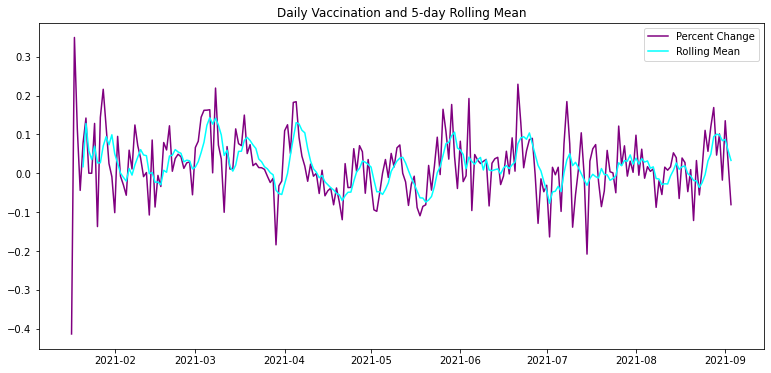

In [31]:
fig = plt.figure(figsize=(13,6))

daily_percent_change = plt.plot(daily_vacc, 
                    color='purple',
                    label='Percent Change')
daily_mean = plt.plot(daily_vacca_rolling_mean, 
                color='cyan', 
                label='Rolling Mean')

plt.legend(loc='best') 
plt.title('Daily Vaccination and 5-day Rolling Mean')
plt.show()

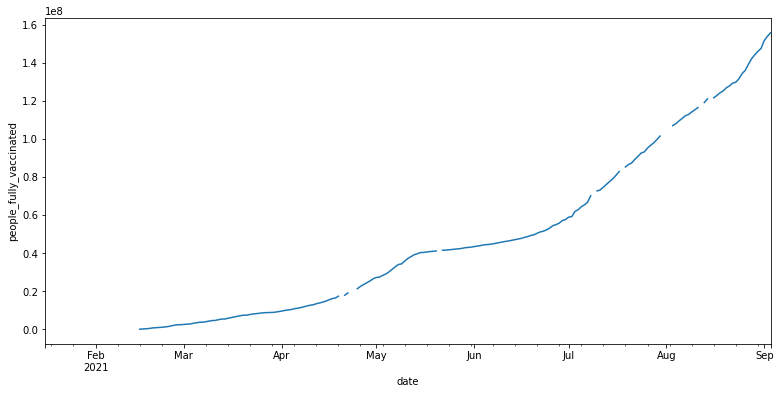

In [32]:
fully_vaccinated['people_fully_vaccinated'].plot(kind = 'line',figsize=(13,6))

plt.ylabel('people_fully_vaccinated')
plt.xlabel('date')

plt.show() 

In [33]:
vaccinedata.head()

,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,
2021-01-16,191181.0,191181.0,191181.0,191181.0,0.01,0.01,137.0
2021-01-17,224301.0,224301.0,33120.0,112150.0,0.02,0.02,80.0
2021-01-18,454049.0,454049.0,229748.0,151350.0,0.03,0.03,109.0
2021-01-19,674835.0,674835.0,220786.0,168709.0,0.05,0.05,121.0
2021-01-20,806484.0,806484.0,131649.0,161297.0,0.06,0.06,116.0


In [34]:
fully_vaccinated.tail()

,people_fully_vaccinated,people_fully_vaccinated_per_hundred
date,,
2021-08-30,146228416.0,10.49
2021-08-31,147797142.0,10.61
2021-09-01,151908785.0,10.90
2021-09-02,154147659.0,11.06
2021-09-03,155987081.0,11.19


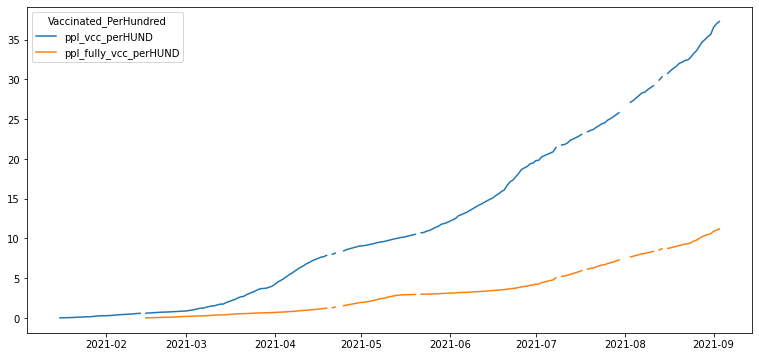

In [35]:
#plot each series
fig = plt.figure(figsize=(13,6))
plt.plot(vaccinedata['people_vaccinated_per_hundred'], label='ppl_vcc_perHUND')
plt.plot(fully_vaccinated['people_fully_vaccinated_per_hundred'], label='ppl_fully_vcc_perHUND')

plt.legend(title='Vaccinated_PerHundred')

#display plot
plt.show()

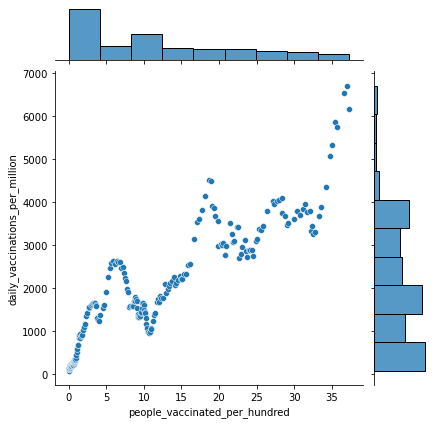

In [36]:
#Joint Plots

jp1= sns.jointplot(data=vaccinedata, x='people_vaccinated_per_hundred', y='daily_vaccinations_per_million')

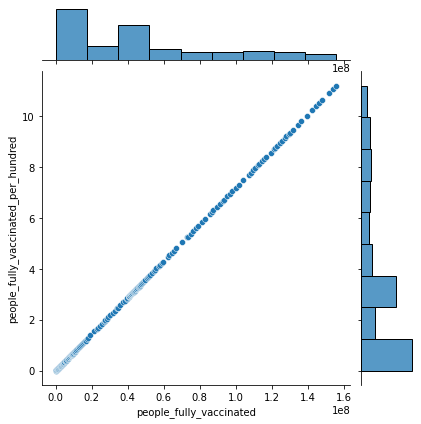

In [37]:
jp2= sns.jointplot(data=fully_vaccinated, x='people_fully_vaccinated', y='people_fully_vaccinated_per_hundred')

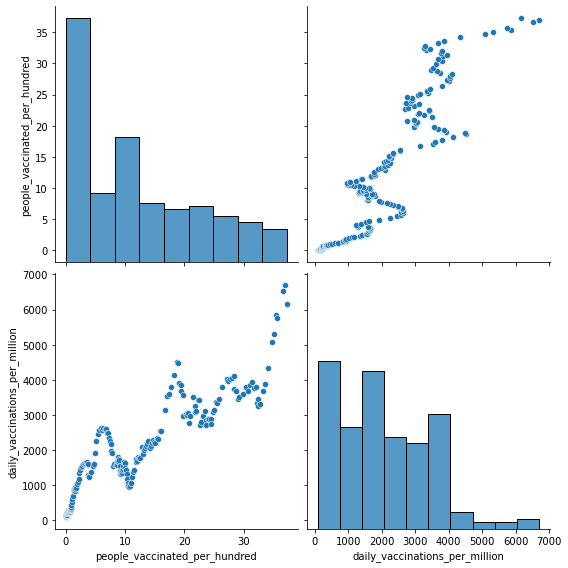

In [38]:
sns.pairplot(vaccinedata,
             height = 4,
             vars = ["people_vaccinated_per_hundred",
                     "daily_vaccinations_per_million"])

plt.show();